In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [8]:
# Normalize Data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
# Create model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [5]:
# Train Model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 8s 133us/sample - loss: 0.2636 - acc: 0.9221
Epoch 2/3
60000/60000 [==============================] - 8s 131us/sample - loss: 0.1052 - acc: 0.9672
Epoch 3/3
60000/60000 [==============================] - 7s 125us/sample - loss: 0.0717 - acc: 0.9776


In [6]:
# Test Accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 1s 79us/sample - loss: 0.0958 - acc: 0.9709
0.09578298149444163 0.9709


In [7]:
# Save model 
model.save('mnist_nn.model')

In [10]:
# Load Model
saved_model = tf.keras.models.load_model('mnist_nn.model')

W0803 17:46:02.849256 140031509550912 hdf5_format.py:263] Sequential models without an `input_shape` passed to the first layer cannot reload their optimizer state. As a result, your model isstarting with a freshly initialized optimizer.


In [11]:
predictions = saved_model.predict(x_test)

In [19]:
import numpy as np

print(np.argmax(predictions[0]))

7


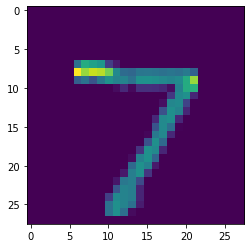

In [13]:
plt.imshow(x_test[0])
plt.show()